In [1]:
import pandas as pd

In [2]:
import seaborn as sns
print(sns.__version__)

0.11.2


In [3]:
import plotly 
import plotly.express as px

In [9]:
import matplotlib.pyplot as plt

In [50]:
plt.style.use('default')

In [4]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
churn_df = churn_data.copy()
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# создаём пустой список
unique_list = []
# пробегаемся по именам столбцов в таблице
for col in churn_df.columns:
    # создаём кортеж (имя столбца, число уникальных значений)
    item = (col, churn_df[col].nunique(),churn_df[col].dtype) 
    # добавляем кортеж в список
    unique_list.append(item) 
# создаём вспомогательную таблицу и сортируем её
unique_counts = pd.DataFrame(
    unique_list,
    columns=['Column_Name', 'Num_Unique', 'Type']
).sort_values(by='Num_Unique',  ignore_index=True)
# выводим её на экран
display(unique_counts)

,Column_Name,Num_Unique,Type
0,Gender,2,object
1,HasCrCard,2,int64
2,IsActiveMember,2,int64
3,Exited,2,int64
4,Geography,3,object
5,NumOfProducts,4,int64
6,Tenure,11,int64
7,Age,70,int64
8,CreditScore,460,int64
9,Surname,2932,object


In [7]:
cols_to_exclude = ['CustomerId','RowNumber','EstimatedSalary','Balance','Surname','CreditScore','Age'] 
for col in churn_df.columns: 
    if col not in cols_to_exclude: 
        churn_df[col] = churn_df[col].astype('category') 
display(churn_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  object  
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  category
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  category
 10  HasCrCard        10000 non-null  category
 11  IsActiveMember   10000 non-null  category
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  category
dtypes: category(7), float64(2), int64(4), object(1)
memory usage: 616.6+ KB


None

Text(0.5, 1.0, 'Cоотношение ушедших и лояльных клиентов')

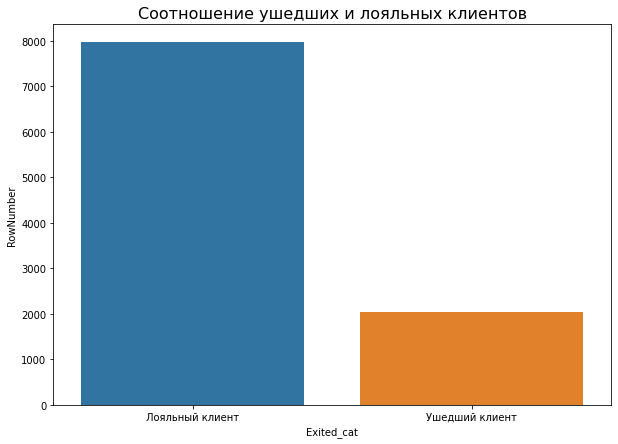

In [38]:
churn_df['Exited_cat'] = churn_df['Exited'].astype('category')
churn_df['Exited_cat'] = churn_df['Exited_cat'].cat.rename_categories({
    0:'Лояльный клиент',
    1:'Ушедший клиент'
})
bar_data = churn_df.groupby(by = 'Exited_cat',as_index=False).count()
fig = plt.figure(figsize=(10,7))
barplot = sns.barplot(
    data=bar_data,
    y='RowNumber',
    x='Exited_cat'
)
barplot.set_title('Cоотношение ушедших и лояльных клиентов',fontsize =16)


Соотношение лояльных клиентов к ушедшим распределно следующим образом: на одного ушедшего клента приходится 3,9 лояльных клиентов.

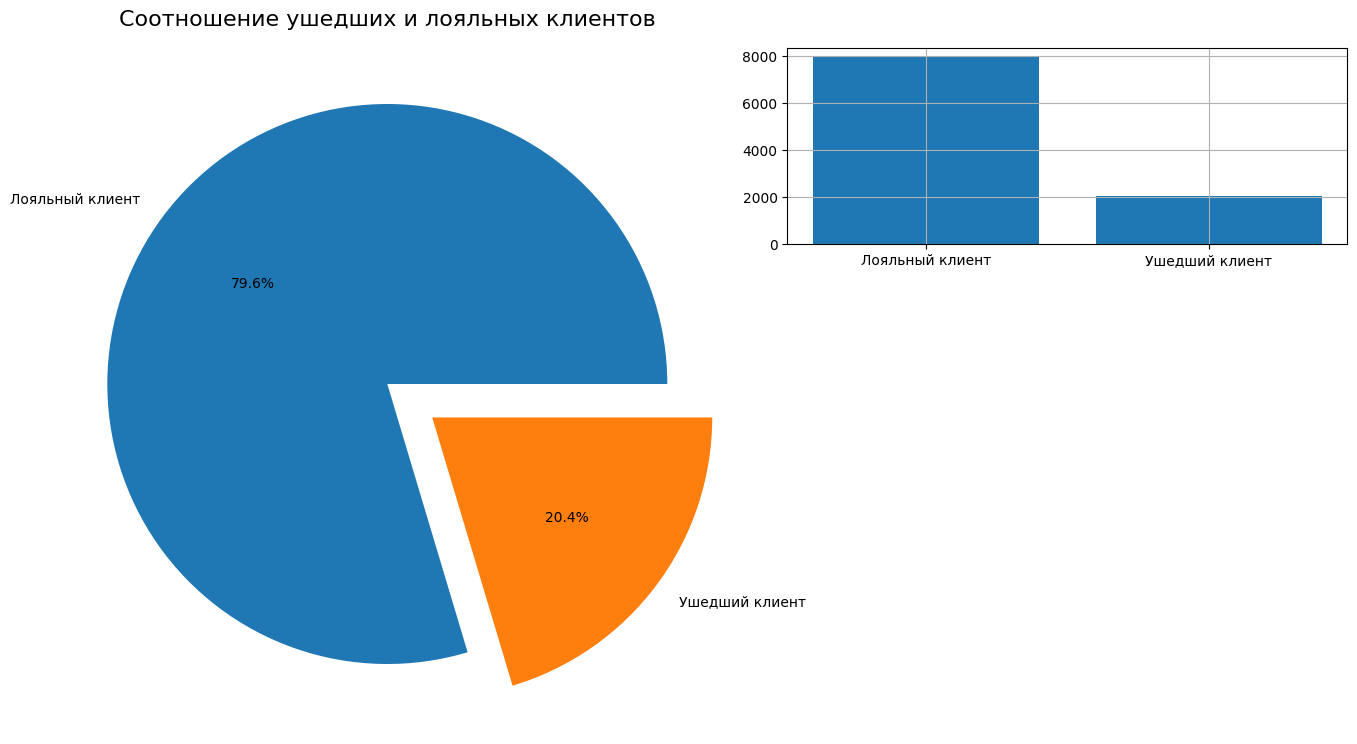

In [70]:
from turtle import width


exited_combinations = churn_df['Exited_cat'].value_counts()
exited_combinations

fig = plt.figure(figsize=(20,7))
pieplot = fig.add_axes([0,0,1,1])
pieplot.pie(
    x=exited_combinations,
    labels=exited_combinations.index,
    autopct='%.1f%%',
    explode=[0,0.2]
)
barplot = fig.add_axes([0.7,0.7,0.28,0.28])
barplot.bar(
    x=exited_combinations.index,
    height=exited_combinations,
)
pieplot.set_title('Cоотношение ушедших и лояльных клиентов',fontsize =16)
barplot.grid(True)